In [1]:
Smax = 8;  T = 8;
K = 3;  sigma = 0.06;  r = 0.08;
include("../FNC.jl")
m = 200;  x,Dx,Dxx = FNC.diffmat2(m,[0,Smax]);
h = x[2]-x[1];

Using the boundary conditions and defining the ODE follow next. 

In [2]:
extend(v) = [ 0; v; 2/3*(h-0.5*v[m-2]+2*v[m-1]) ];
chop(u) = u[2:m];
ODE = function (v,p,t) 
    sigma,r = p
    u = extend(v)
    ux = Dx*u;  uxx = Dxx*u;
    f = @.sigma^2/2*x^2*uxx + r*x*ux - r*u
    return chop(f)
end;

Now we define the initial conditions and solve the IVP.

In [3]:
v0 = @.max( 0, x-K )

using DifferentialEquations
V = solve(ODEProblem(ODE,chop(v0),(0.,T),(sigma,r)));

Extend the solution to the boundaries at each time, then plot.

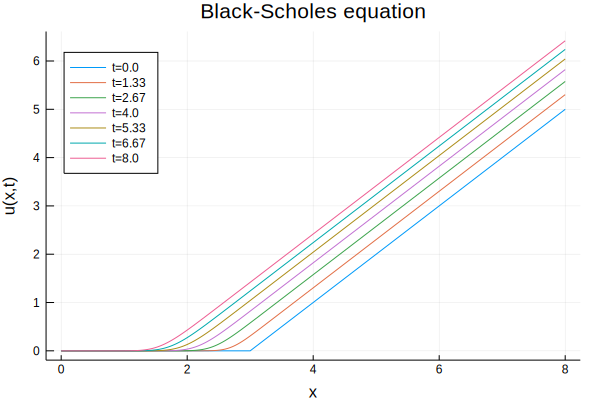

In [4]:
t = range(0,stop=T,length=7) 
U = hcat( (extend(V(t)) for t in t)... )

using Plots
plot(x,U,label=["t=$(round(t,digits=2))" for t in t],
    xaxis=("x"), yaxis=("u(x,t)"), title="Black-Scholes equation",leg=:topleft)

In [5]:
an = @animate for t = range(0,stop=T,length=100)
    plot(x,extend(V(t)),label="t=$(round(t,digits=3))",
        xaxis=("x"), yaxis=([0,10],"u(x,t)"), title="Black-Scholes equation",leg=:topleft)
end
gif(an,"molbsbc.gif")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/Dropbox/books/fnc-extras/julia/chapter11/molbsbc.gif
└ @ Plots /Users/driscoll/.julia/packages/Plots/UQI78/src/animation.jl:90


Plots.AnimatedGif("/Users/driscoll/Dropbox/books/fnc-extras/julia/chapter11/molbsbc.gif")